In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
df = pd.read_csv('/content/sample_data/park_TEST.csv')

df.head()

,PERMIT_NUM,VEH_HRS_FROM,VEH_HRS_FROM_AM/PM,VEH_HRS_TO,VEH_HRS_TO_AMPM,SUN,MON,TUE,WED,THUR,...,Permit ISSUED_DATE,PERMIT_STATUS,PLATE_STATE,Lost App. VEHICLE_STOLEN,APPL_DATE,APPL_STATUS,APPL_DEFINITION,CITY,CUST_STATE,ZIP
0,738641,8,A,4,P,N,Y,Y,Y,Y,...,02-07-2023,A,NY,NaN,01/31/2023,C,Plate-specific Organization DFTA funded,FOREST HILLS,NY,11375
1,738640,8,A,4,P,N,Y,Y,Y,Y,...,02-07-2023,A,NY,NaN,01/31/2023,C,Plate-specific Organization DFTA funded,FOREST HILLS,NY,11375
2,738639,8,A,4,P,N,Y,Y,Y,Y,...,02-07-2023,A,NY,NaN,01/31/2023,C,Plate-specific Organization DFTA funded,FOREST HILLS,NY,11375
3,738638,8,A,4,P,N,Y,Y,Y,Y,...,02-07-2023,A,NY,NaN,01/31/2023,C,Plate-specific Organization DFTA funded,FOREST HILLS,NY,11375
4,738637,8,A,4,P,N,Y,Y,Y,Y,...,02-07-2023,A,NY,NaN,01/31/2023,C,Plate-specific Organization DFTA funded,FOREST HILLS,NY,11375


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PERMIT_NUM                414 non-null    int64  
 1   VEH_HRS_FROM              414 non-null    int64  
 2   VEH_HRS_FROM_AM/PM        414 non-null    object 
 3   VEH_HRS_TO                414 non-null    int64  
 4   VEH_HRS_TO_AMPM           414 non-null    object 
 5   SUN                       414 non-null    object 
 6   MON                       414 non-null    object 
 7   TUE                       414 non-null    object 
 8   WED                       414 non-null    object 
 9   THUR                      414 non-null    object 
 10  FRI                       414 non-null    object 
 11  SAT                       414 non-null    object 
 12  Permit EFFECTIVE_DATE     414 non-null    object 
 13  Permit EXPIRATION_DATE    414 non-null    object 
 14  Permit ISS

In [ ]:
df.describe()

,PERMIT_NUM,VEH_HRS_FROM,VEH_HRS_TO,Lost App. VEHICLE_STOLEN,ZIP
count,414.000000,414.000000,414.000000,0.0,414.000000
mean,738312.905797,8.782609,8.086957,NaN,10935.821256
std,182.919923,1.749739,2.676627,NaN,649.759309
min,737975.000000,1.000000,1.000000,NaN,8701.000000
25%,738183.250000,8.000000,5.000000,NaN,10065.000000
50%,738285.500000,8.000000,10.000000,NaN,11204.000000
75%,738488.750000,9.000000,10.000000,NaN,11415.000000
max,738641.000000,12.000000,12.000000,NaN,11791.000000


In [ ]:
df.shape


(414, 24)

In [ ]:
df.apply(lambda x: len(x.isnull()))

PERMIT_NUM                  414
VEH_HRS_FROM                414
VEH_HRS_FROM_AM/PM          414
VEH_HRS_TO                  414
VEH_HRS_TO_AMPM             414
SUN                         414
MON                         414
TUE                         414
WED                         414
THUR                        414
FRI                         414
SAT                         414
Permit EFFECTIVE_DATE       414
Permit EXPIRATION_DATE      414
Permit ISSUED_DATE          414
PERMIT_STATUS               414
PLATE_STATE                 414
Lost App. VEHICLE_STOLEN    414
APPL_DATE                   414
APPL_STATUS                 414
APPL_DEFINITION             414
CITY                        414
CUST_STATE                  414
ZIP                         414
dtype: int64

In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
df.apply(lambda x: len(x.unique()))

PERMIT_NUM                  413
VEH_HRS_FROM                  7
VEH_HRS_FROM_AM/PM            1
VEH_HRS_TO                    9
VEH_HRS_TO_AMPM               2
SUN                           2
MON                           1
TUE                           1
WED                           1
THUR                          1
FRI                           2
SAT                           2
Permit EFFECTIVE_DATE         2
Permit EXPIRATION_DATE        2
Permit ISSUED_DATE            4
PERMIT_STATUS                 2
PLATE_STATE                   4
Lost App. VEHICLE_STOLEN      1
APPL_DATE                    52
APPL_STATUS                   1
APPL_DEFINITION               3
CITY                         19
CUST_STATE                    2
ZIP                          49
dtype: int64

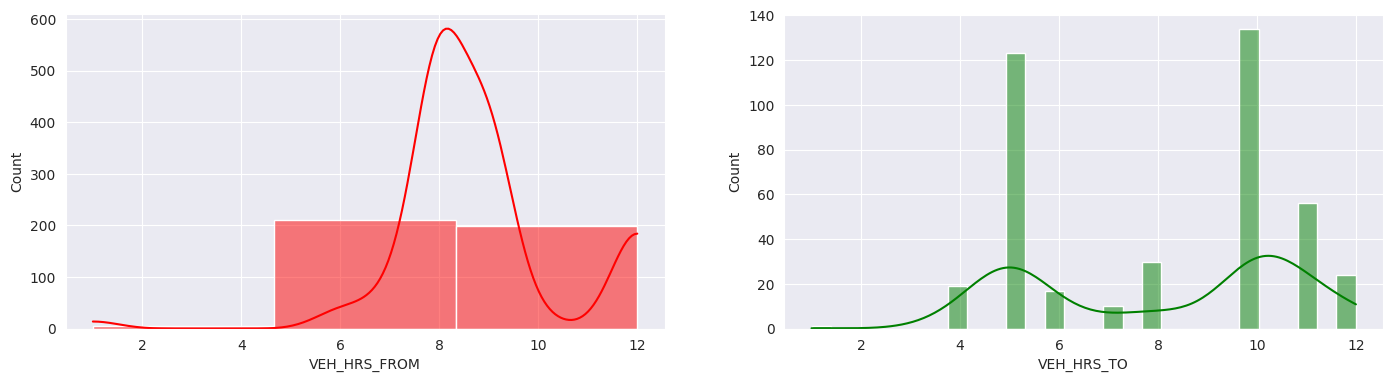

In [ ]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(df.VEH_HRS_FROM ,binwidth=3.4 , color="red" , kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(df.VEH_HRS_TO ,binwidth=0.4 ,color = "green", kde={'alpha':0.5})
plt.show()

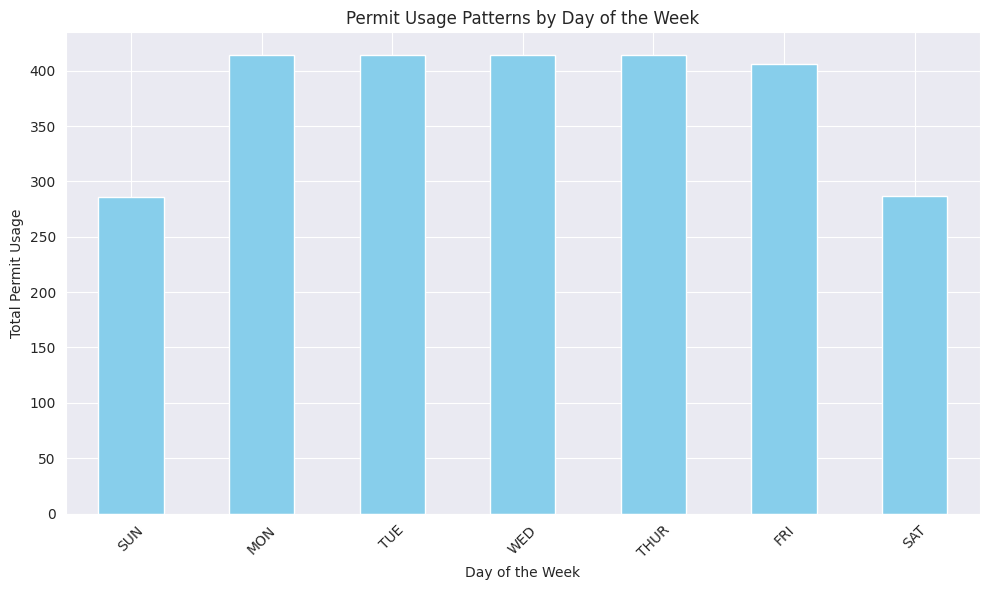

In [ ]:
# Create a dictionary to map 'Y' and 'N' to 1 and 0, respectively
day_map = {'Y': 1, 'N': 0}

# Convert columns representing days of the week to binary format
days_of_week = ['SUN', 'MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT']
for day in days_of_week:
    df[day] = df[day].map(day_map)

# Calculate total usage for each day of the week
usage_by_day = df[days_of_week].sum()

# Plot the distribution of permit usage across different days of the week
plt.figure(figsize=(10, 6))
usage_by_day.plot(kind='bar', color='skyblue')
plt.title('Permit Usage Patterns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Permit Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

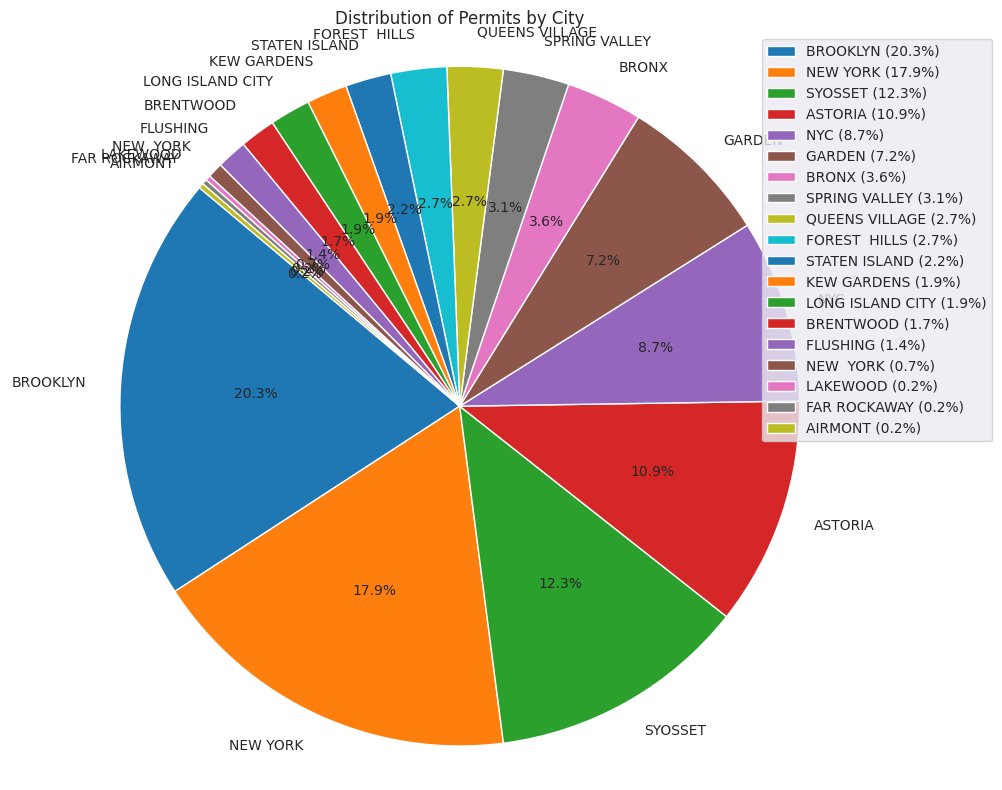

In [ ]:
# Group the data by city and calculate the total number of permits for each city
permit_distribution_by_city = df.groupby('CITY').size()

# Sort the data by permit count in descending order for better visualization
permit_distribution_by_city = permit_distribution_by_city.sort_values(ascending=False)

# Plot the distribution of permits by city using a pie chart
plt.figure(figsize=(10, 8))
pie_chart = permit_distribution_by_city.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Permits by City')
plt.ylabel('')  # Remove the y-label
plt.axis('equal')  # Ensure the pie chart is circular

# Create legend labels with percentages
legend_labels = [f'{city} ({permit_distribution_by_city[city]/permit_distribution_by_city.sum()*100:.1f}%)' for city in permit_distribution_by_city.index]

# Add legend
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()

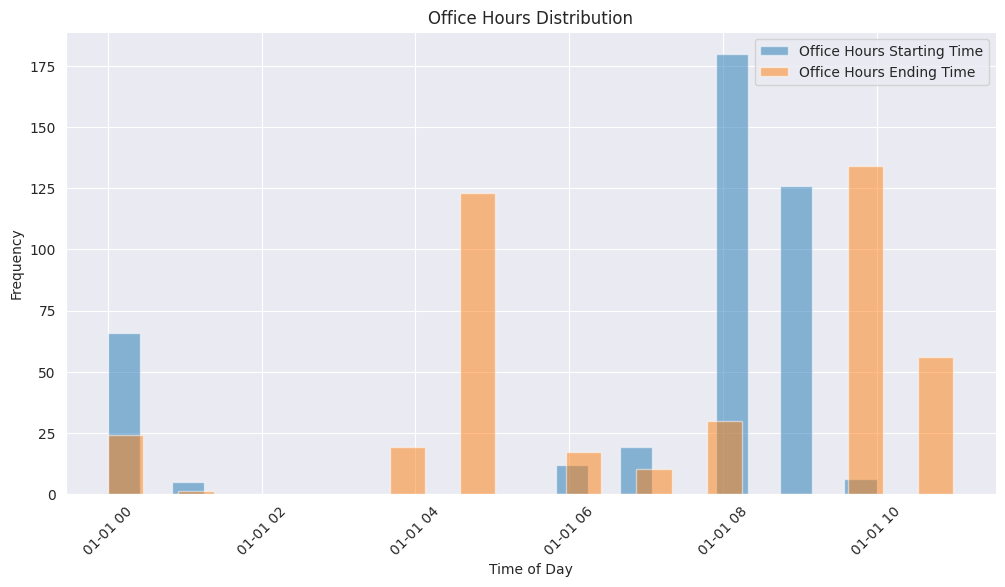

In [ ]:
# Convert 'VEH_HRS_FROM' and 'VEH_HRS_TO' columns to datetime objects
df['VEH_HRS_FROM'] = pd.to_datetime(df['VEH_HRS_FROM'], format='%I')
df['VEH_HRS_TO'] = pd.to_datetime(df['VEH_HRS_TO'], format='%I')

# Analyze Office Hours Distribution
plt.figure(figsize=(12, 6))
plt.hist(df['VEH_HRS_FROM'], bins=24, alpha=0.5, label='Office Hours Starting Time')
plt.hist(df['VEH_HRS_TO'], bins=24, alpha=0.5, label='Office Hours Ending Time')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.title('Office Hours Distribution')
plt.legend()
plt.xticks(rotation=45)
plt.show()

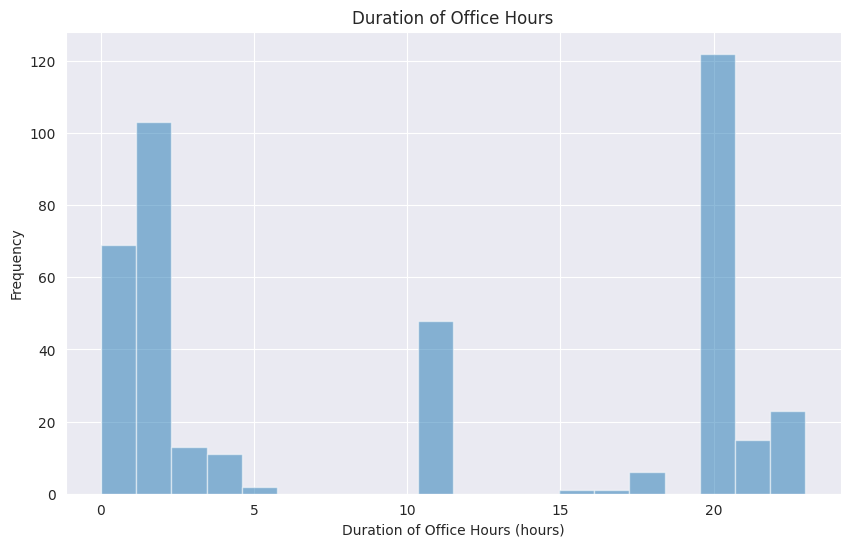

In [ ]:
# Duration of Office Hours
df['Office_Hours_Duration'] = (df['VEH_HRS_TO'] - df['VEH_HRS_FROM']).dt.seconds / 3600
plt.figure(figsize=(10, 6))
plt.hist(df['Office_Hours_Duration'], bins=20, alpha=0.5)
plt.xlabel('Duration of Office Hours (hours)')
plt.ylabel('Frequency')
plt.title('Duration of Office Hours')
plt.show()

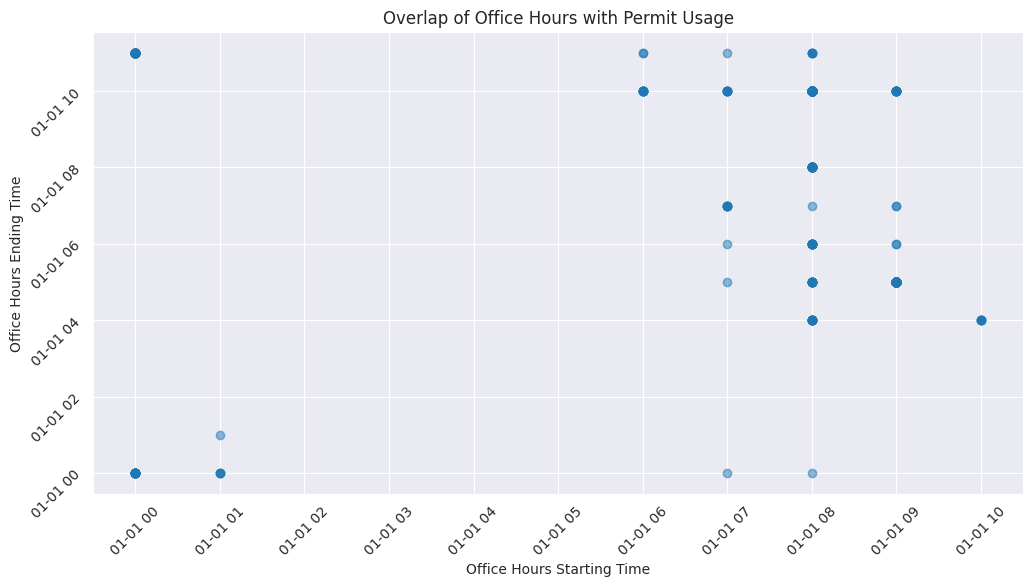

In [ ]:
# Overlap of Office Hours with Permit Usage
plt.figure(figsize=(12, 6))
plt.scatter(df['VEH_HRS_FROM'], df['VEH_HRS_TO'], alpha=0.5)
plt.xlabel('Office Hours Starting Time')
plt.ylabel('Office Hours Ending Time')
plt.title('Overlap of Office Hours with Permit Usage')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(True)

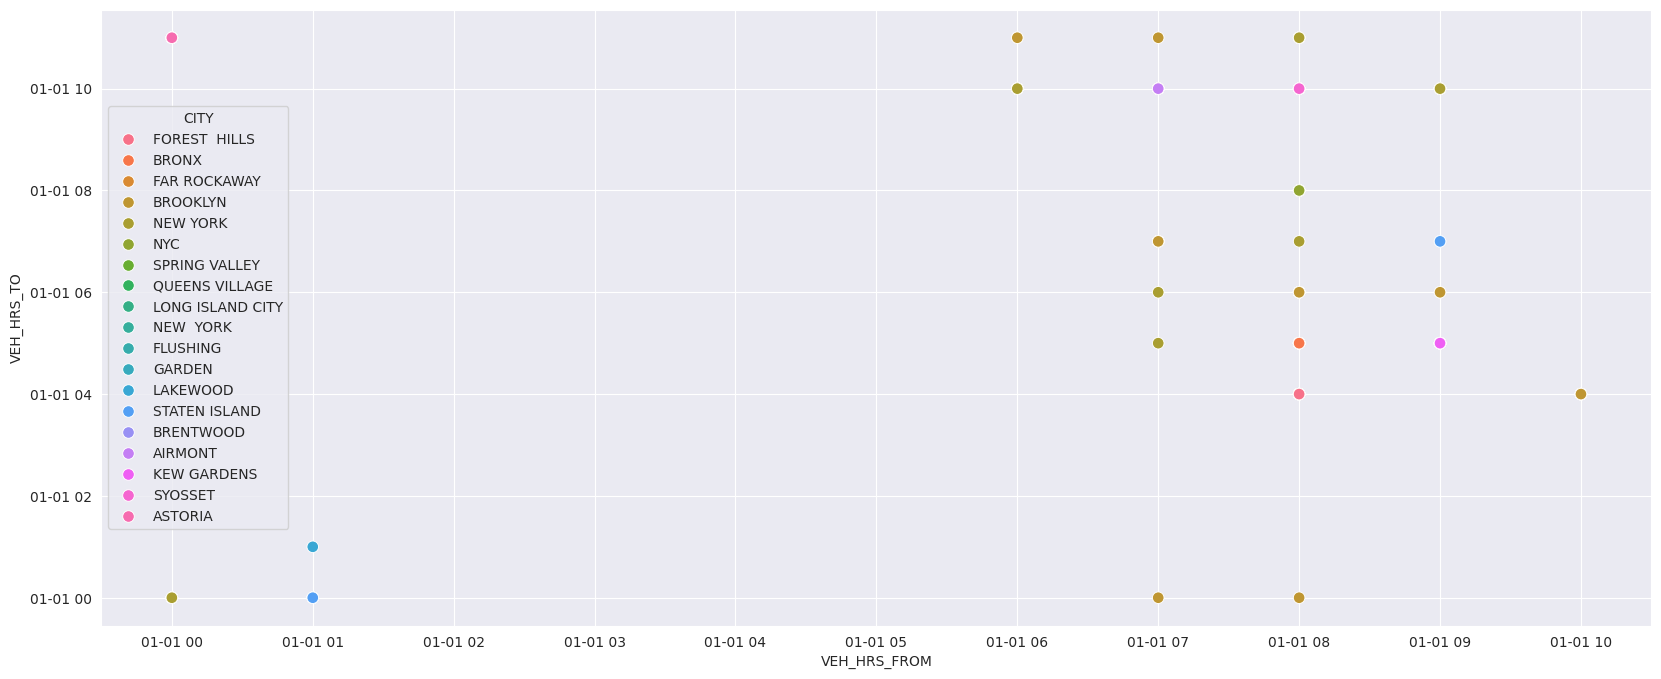

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, x="VEH_HRS_FROM", y="VEH_HRS_TO" , hue="CITY" ,s=70)
plt.show()

<ipython-input-16-92063c40acc6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True )


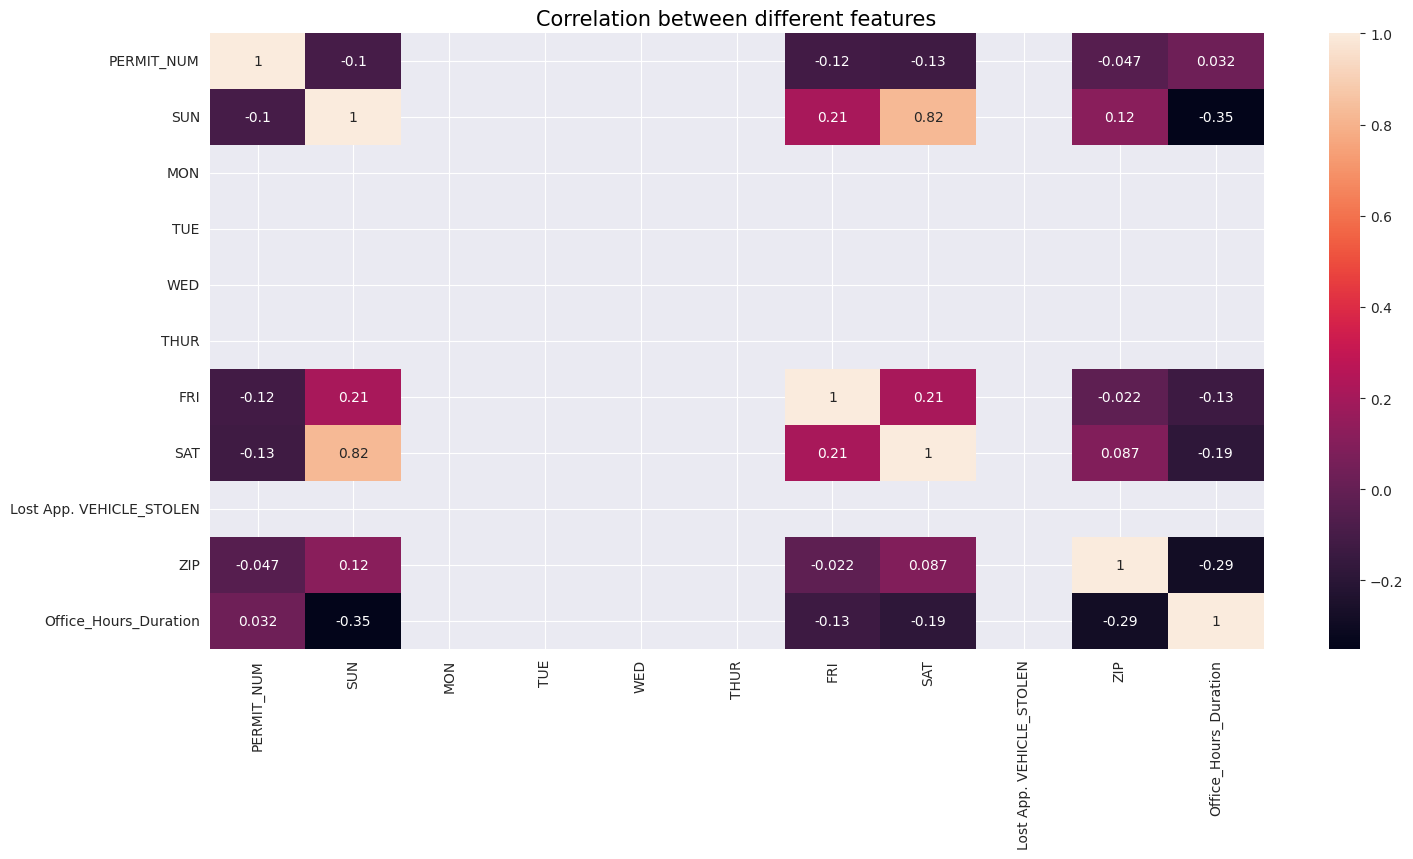

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(17, 8))
sns.heatmap(df.corr(), annot=True )
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [ ]:

# Function to calculate the permit duration
def calculate_permit_duration(permit_number):
    permit_info = df[df['PERMIT_NUM'] == permit_number]
    if permit_info.empty:
        return "Permit number not found!"
    else:
        # Convert start and end times to 24-hour format for calculation
        start_hour = permit_info['VEH_HRS_FROM'].iloc[0].hour + (12 if permit_info['VEH_HRS_FROM_AM/PM'].iloc[0] == 'P' else 0)
        end_hour = permit_info['VEH_HRS_TO'].iloc[0].hour + (12 if permit_info['VEH_HRS_TO_AMPM'].iloc[0] == 'P' else 0)

        # Calculate duration
        duration = (end_hour - start_hour) % 24

        return duration

# Ask user for permit number
while True:
    try:
        permit_number = int(input("Enter the permit number: "))
        break
    except ValueError:
        print("Invalid input. Please enter a valid permit number.")

# Calculate and print the duration
duration = calculate_permit_duration(permit_number)
permit_info = df[df['PERMIT_NUM'] == permit_number]
if permit_info.empty:
    print("Permit number not found!")
else:
    print(f"The permit with permit number {permit_number} is provided for {duration} hours.")
    print(f"Start time: {permit_info['VEH_HRS_FROM'].iloc[0]} {permit_info['VEH_HRS_FROM_AM/PM'].iloc[0]}")
    print(f"End time: {permit_info['VEH_HRS_TO'].iloc[0]} {permit_info['VEH_HRS_TO_AMPM'].iloc[0]}")

Enter the permit number: 738641
The permit with permit number 738641 is provided for 8 hours.
Start time: 1900-01-01 08:00:00 A
End time: 1900-01-01 04:00:00 P


In [ ]:


# Function to filter and print permit information
def print_permit_info(permit_num):
    permit_info = df[df['PERMIT_NUM'] == permit_num]
    if permit_info.empty:
        print("Permit number not found.")
    else:
        permit_info = permit_info[['Permit ISSUED_DATE', 'APPL_DATE', 'CITY', 'ZIP', 'APPL_STATUS']]
        print(permit_info)

# Main function
def main():
    while True:
        choice = input("Enter 1 to search for a permit: ")
        if choice == '1':
            permit_num = int(input("Enter permit number: "))
            print_permit_info(permit_num)
        else:
            print("Invalid choice.")
        cont = input("Do you want to continue? (yes/no): ")
        if cont.lower() != 'yes':
            break

if __name__ == "__main__":
    main()


Enter 1 to search for a permit: 1
Enter permit number: 738641
  Permit ISSUED_DATE   APPL_DATE           CITY    ZIP APPL_STATUS
0         02-07-2023  01/31/2023  FOREST  HILLS  11375           C
Do you want to continue? (yes/no): no
